# <center>Laboratorium 6<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


c:\Users\revte\Desktop\Studia\Metody_Numeryczne\lab6\laboratorium-6-FilipPasternak\main.py:82: RuntimeWarning: divide by zero encountered in double_scalars
  Y.append(yi @ L / sum(L))


***Zadanie 1.***  

Zaimlementować wzór barycentryczny podany na wykładzie jako funkcję barycentric_inte w main.py. Następnie dla funkcji ciągłej nieróżniczkowalnej z [Zadania domoego 2] przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* jak i za zaimplementowanego wzoru barycentrycznego. W tym celu należy:

 - Wykonać w węzłach Czebyszewa (zaimplementowanych w ramach zadania domowego) interpolację rzędu 10, 100, 1000, 10000, 100000.
 - Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  
 - Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  


Przykład użycia funkcji barycentric_interpolate:

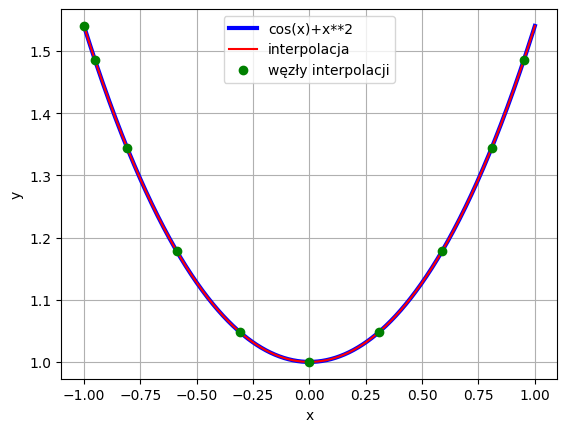

In [2]:
from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 10
xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

In [41]:
f1 = lambda x: np.sign(x)*x + x*x
x = np.linspace(-0.99,0.99,1001)

xch10 = main.chebyshev_nodes(10)
xch100 = main.chebyshev_nodes(100)
xch1000 = main.chebyshev_nodes(1000)
xch10000 = main.chebyshev_nodes(10000)
xch100000 = main.chebyshev_nodes(100000)
w10 = main.bar_czeb_weights(10)
w100 = main.bar_czeb_weights(100)
w1000 = main.bar_czeb_weights(1000)
w10000 = main.bar_czeb_weights(10000)
w100000 = main.bar_czeb_weights(100000)

#interpolacja rzedu 10
yin10 = main.barycentric_inte(xch10, f1(xch10), w10, x)
#interpolacja rzedu 100
yin100 = main.barycentric_inte(xch100, f1(xch100), w100, x)
#interpolacja rzedu 1000
yin1000 = main.barycentric_inte(xch1000, f1(xch1000), w1000, x)
#interpolacja rzedu 10000
yin10000 = main.barycentric_inte(xch10000, f1(xch10000), w10000, x)
#interpolacja rzedu 100000
yin100000 = main.barycentric_inte(xch100000, f1(xch100000), w100000, x)


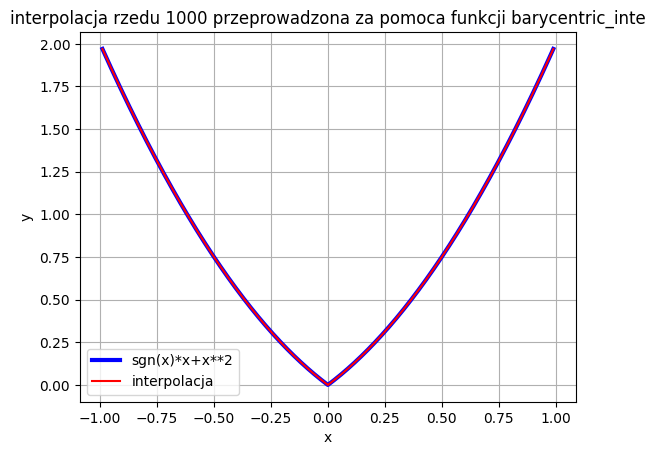

In [63]:

plt.plot(x,f1(x),'b',  linewidth=3 ,label = 'sgn(x)*x+x**2')
plt.plot(x,yin1000,'r',label = 'interpolacja')
plt.xlabel("x")
plt.ylabel("y")
plt.title("interpolacja rzedu 1000 przeprowadzona za pomoca funkcji barycentric_inte")
plt.legend(loc = 0)
plt.grid()
plt.show()

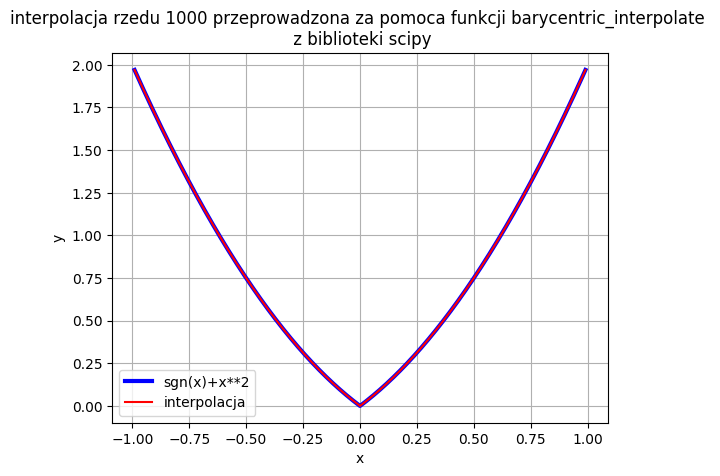

In [62]:
y_scipy = barycentric_interpolate(xch1000, f1(xch1000), x)


plt.plot(x,f1(x),'b',  linewidth=3 ,label = 'sgn(x)*x+x**2')
plt.plot(x,y_scipy,'r',label = 'interpolacja')
plt.xlabel("x")
plt.ylabel("y")
plt.title("interpolacja rzedu 1000 przeprowadzona za pomoca funkcji barycentric_interpolate \n z biblioteki scipy")
plt.legend(loc = 0)
plt.grid()
plt.show()

In [47]:
times = np.zeros(5)

In [48]:
times10 = %timeit -o main.barycentric_inte(xch10, f1(xch10), w10, x)
times[0] = np.mean(times10.timings)

8.47 ms ± 612 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [49]:
times100 = %timeit -o yin100 = main.barycentric_inte(xch100, f1(xch100), w100, x)
times[1] = np.mean(times100.timings)

17.2 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
times1000 = %timeit -o main.barycentric_inte(xch1000, f1(xch1000), w1000, x)
times[2] = np.mean(times1000.timings)

140 ms ± 15.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:
times10000 = %timeit -o main.barycentric_inte(xch10000, f1(xch10000), w10000, x)
times[3] = np.mean(times10000.timings)

1.92 s ± 210 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
times100000 = %timeit -o main.barycentric_inte(xch100000, f1(xch100000), w100000, x)
times[4] = np.mean(times100000.timings)

17.6 s ± 1.58 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


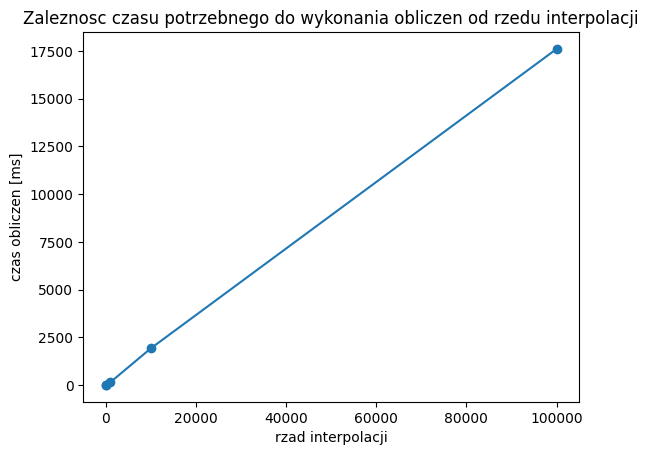

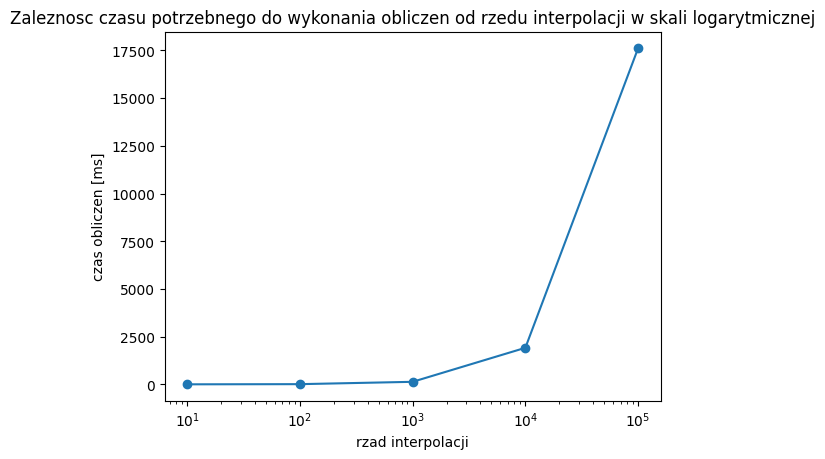

In [60]:
rzad_inter = [10, 100, 1000, 10000, 100000]
times_ms = times * 1000

plt.plot(rzad_inter, times_ms)
plt.scatter(rzad_inter, times_ms)
plt.ylabel("czas obliczen [ms]")
plt.xlabel("rzad interpolacji")
plt.title("Zaleznosc czasu potrzebnego do wykonania obliczen od rzedu interpolacji")
plt.show()

plt.plot(rzad_inter, times_ms)
plt.scatter(rzad_inter, times_ms)
plt.ylabel("czas obliczen [ms]")
plt.xlabel("rzad interpolacji")
plt.xscale('log')
plt.title("Zaleznosc czasu potrzebnego do wykonania obliczen od rzedu interpolacji w skali logarytmicznej")
plt.show()

In [ ]:
# Jak mozna latwo zauwazyc zaleznosc miedzy czasem wykonywania obliczen od rzedu interpolacji jest liniowa

***Zadanie 2.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania domowego 2]. Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 

W tym celu należy:
- wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów (nie będącymi węzłami interpolacji np. punkty równoodległe),
- wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu, maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
- dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu,
- dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

c:\Users\revte\Desktop\Studia\Metody_Numeryczne\lab6\laboratorium-6-FilipPasternak\main.py:82: RuntimeWarning: divide by zero encountered in double_scalars
  Y.append(yi @ L / sum(L))


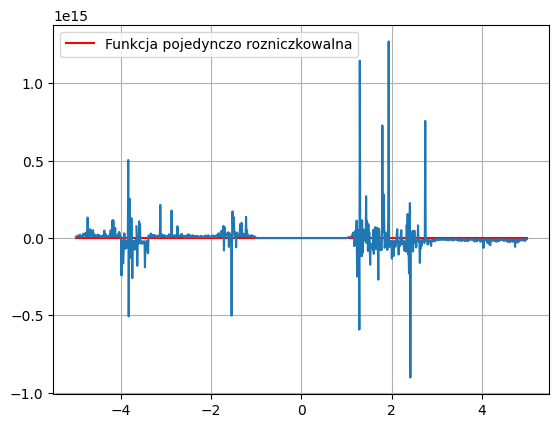

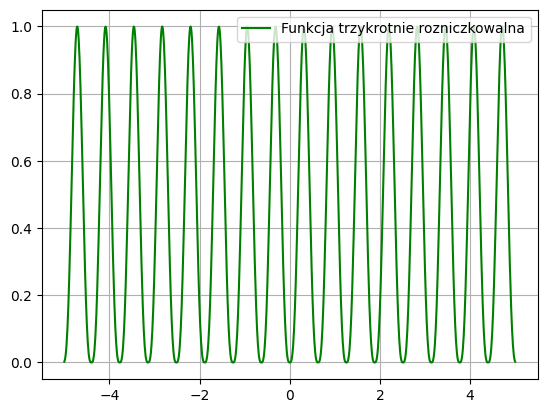

In [19]:
x = np.linspace(-5, 5, 1000)
f_jedn = main.f2
f_trzyk = main.f3
y_jedn = f_jedn(x)
y_trzyk = f_trzyk(x)

xch = main.chebyshev_nodes(len(x) - 1)
wi = main.bar_czeb_weights(len(x) - 1)

f_jedn_inter = main.barycentric_inte(xch, f_jedn(x), wi, x)

plt.plot(x, y_jedn, 'r', label = 'Funkcja pojedynczo rozniczkowalna')
plt.plot(x, f_jedn_inter)
plt.legend(loc = 0)
plt.grid()
plt.show()

plt.plot(x, y_trzyk, 'g', label = 'Funkcja trzykrotnie rozniczkowalna')
plt.legend(loc = 1)
plt.grid()
plt.show()

In [ ]:
# Nie działa nie ważne jak bym próbował

***Zadanie 3.***  
Dla funkcji nieciągłej z [Zadania domowego 2] przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

Text(0.5, 1.0, 'Efekt Gibbsa dla funkcji nieciaglej')

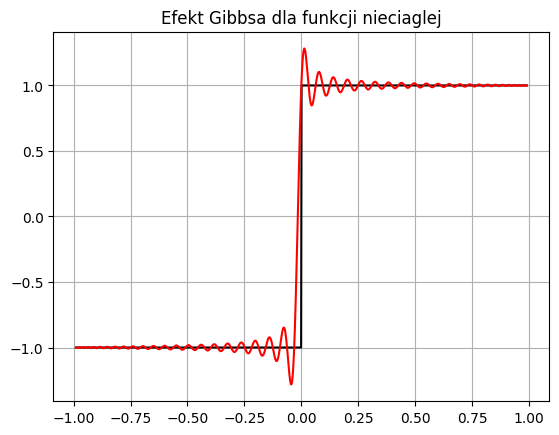

In [2]:
x = np.linspace(-0.99, 0.99, 1000)
y = main.f5(x)
norm = list()
n = 100
node = main.bar_czeb_weights(n)
x_node = main.chebyshev_nodes(n)
y_node = main.f5(x_node)
y_inte = main.barycentric_inte(x_node, y_node, node, x)
norm.append(main.L_inf(y, y_inte))
plt.plot(x, y, "k")
plt.plot(x, y_inte, "r")
plt.grid()
plt.title("Efekt Gibbsa dla funkcji nieciaglej")

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)